## CNN - Example 05

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Load Dataset

In [2]:
# CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, 
# and 10,000 test images.

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### View Data

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_train[0].shape)

(50000, 32, 32, 3)
(50000, 1)
(32, 32, 3)


In [4]:
print(y_train[1])

[9]


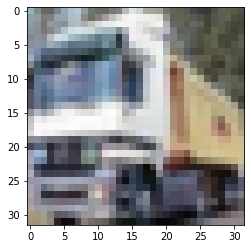

In [5]:
plt.imshow(x_train[1])

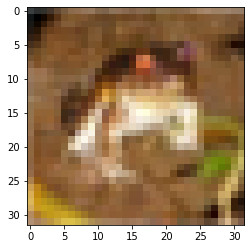

In [6]:
plt.imshow(x_train[0])

### Normalize

In [7]:
x_train = x_train/225
x_test = x_test/255

### One Hot encoded

In [8]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)
print(y_cat_train.shape)
print(y_cat_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Model # 1

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

#### Early stopping

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# try changing to val_accuracy

In [13]:
model_history = model.fit(x_train,
                          y_cat_train,
                          epochs=15,
                          validation_data=(x_test,y_cat_test),
                          callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5288 - accuracy: 0.4523 - val_loss: 1.3129 - val_accuracy: 0.5280
Epoch 2/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1643 - accuracy: 0.5937 - val_loss: 1.1742 - val_accuracy: 0.5953
Epoch 3/15
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0109 - accuracy: 0.6480 - val_loss: 0.9979 - val_accuracy: 0.6550
Epoch 4/15
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9034 - accuracy: 0.6878 - val_loss: 0.9721 - val_accuracy: 0.6703
Epoch 5/15
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8282 - accuracy: 0.7162 - val_loss: 0.9810 - val_accuracy: 0.6664
Epoch 6/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.7617 - accuracy: 0.7394 - val_loss: 0.9690 - val_accuracy: 0.6729
Epoch 7/15
1563/1563 [==============================] - 46s 30ms/step - loss: 0.7097 - accuracy: 0.7573 - val_loss: 1.0873 -

#### Save model

In [14]:
# Saving model
from tensorflow.keras.models import load_model
model_file = 'D:\\Sandbox\\Github\\MODELS\\' + '03_cifar_10.h5'
model.save(model_file)

#### Retreive model

In [ ]:
# Retrieve model
model = load_model(model_file)

#### Evaluate

In [11]:
print(model.metrics_names)

['loss', 'accuracy']


##### Eval - Train

In [13]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

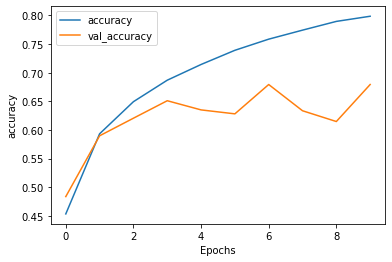

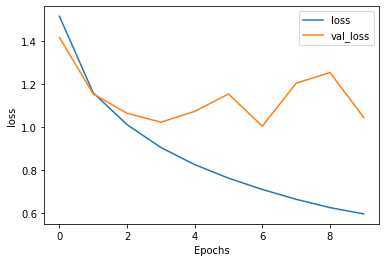

In [14]:
plot_graphs(model_history, "accuracy")
plot_graphs(model_history, "loss")

##### Eval - Test

In [15]:
test_metrics = model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0454 - accuracy: 0.6794


In [16]:
print('Loss on test dataset:', test_metrics[0])
print('Accuracy on test dataset:', test_metrics[1])

Loss on test dataset: 1.0454446077346802
Accuracy on test dataset: 0.6794000267982483


In [18]:
print("Loss and Accuracy on Train dataset:")
pd.DataFrame(model_history.history).tail(1)

Loss and Accuracy on Train dataset:


,loss,accuracy,val_loss,val_accuracy
9,0.597332,0.79856,1.045445,0.6794


#### Predictions

In [19]:
y_prediction = np.argmax(model.predict(x_test), axis=-1)

#### Reports

              precision    recall  f1-score   support

           0       0.58      0.80      0.67      1000
           1       0.74      0.85      0.79      1000
           2       0.68      0.51      0.58      1000
           3       0.54      0.47      0.50      1000
           4       0.59      0.71      0.64      1000
           5       0.67      0.51      0.57      1000
           6       0.75      0.76      0.75      1000
           7       0.78      0.68      0.73      1000
           8       0.72      0.81      0.76      1000
           9       0.78      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

[[795  22  23  12  24   5  13   5  75  26]
 [ 43 851   3   3   6   0   5   0  37  52]
 [115  20 506  54 108  55  69  31  28  14]
 [ 79  24  55 468  97 112  72  28  44  21]
 [ 57  12  39  46 706  23  42  53  14   8]
 [ 43  18  42 193  68 506 

<AxesSubplot:>

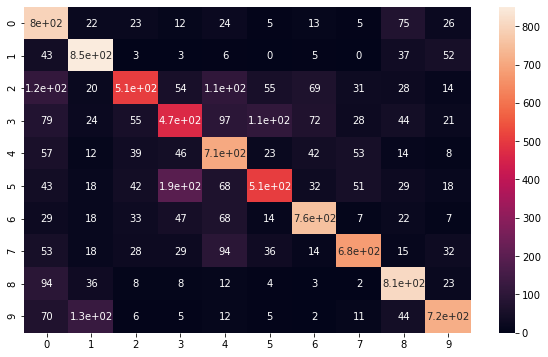

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_prediction))
print(confusion_matrix(y_test,y_prediction))

import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

#### Predictions go wrong!

In [11]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

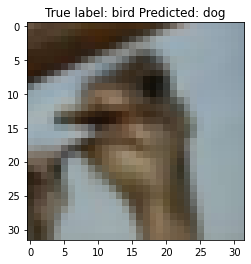

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]

i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_prediction[i]]));

### Additional file(s) to test the model

### Conclusion : Final thoughts

In [44]:
# Rule of thumb
# 1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
# 2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
# 3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
# 4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

In [45]:
print("Percentage of wrong predcitions : " + str(len(misclassified_idx)/len(y_prediction)*100) + " %")

Percentage of wrong predcitions : 900000.0 %


In [46]:
print("Model's maximum accuracy            : " + str(np.max(model_history.history['accuracy'])*100) + " %")
print("Model's maximum validation accuracy : " + str(test_metrics[1]*100) + " %")

Model's maximum accuracy            : 79.85600233078003 %
Model's maximum validation accuracy : 67.94000267982483 %


In [60]:
# Todo : Model has High Bias and Low Variance with 3% gap. It must improve Bias by more data, augmentation, dropout, regulation or batch-norm etc.